In [1]:
import spacy

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
from string import punctuation

pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
nlp = spacy.load('en_vectors_web_lg')

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [28]:
text_file = open("/home/pranjut/workspace/nlp/exp/data/raman2", "r")
feedbacks = text_file.read().splitlines() #.readlines()
corpus = np.array(feedbacks)
norm_corpus = normalize_corpus(corpus)

unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
# word_glove_vectors

In [29]:
corpus_df = pd.DataFrame({'Document': corpus})
corpus_df = corpus_df[['Document']]
# pd.DataFrame(word_glove_vectors, index=unique_words)


In [30]:
print('Total lines:', len(feedbacks))
print('\nSample line:', feedbacks[1])
print('\nProcessed line:', norm_corpus[1])

Total lines: 297

Sample line: session was good.

Processed line: session good


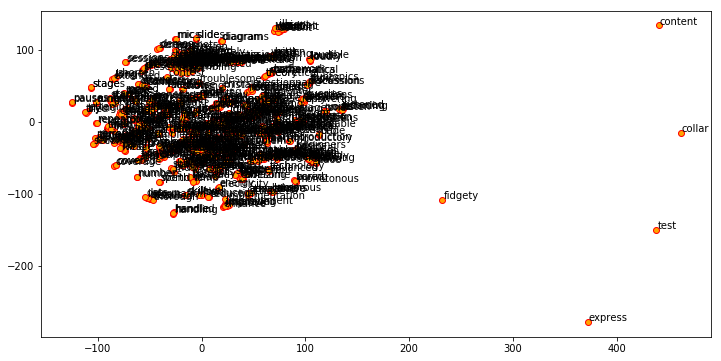

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [24]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])

In [25]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=4, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,ClusterLabel
0,Great effort.,3
1,session was good.,0
2,session was very interactive.,0
3,Communication skills and Pace of discussion were too good.,1
4,"The presentation was good overall but a few places, you were unable to handle the questions properly.",1
5,Good session raman :),0
6,nice presentation!,2
7,"Let me tell you, Raman, you are a nice presenter.",1
8,"So, I'll only explain <5 points, When you asked for suggestions and questions, if someone is giving suggestions, you need to repeat that suggestion, so that it becomes a part of your recording and...",1
9,I just felt that you just listened to Bhavya's point and ignored it compeletely...,1
